In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
ride_data = ride_data.dropna(how='any')
ride_data.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [5]:
# ride_data_df = ride_data.groupby('city', group_keys=False).apply(lambda x: x.sample(1))
# ride_data_df.head()

In [6]:
# Combine the data into a single dataset
join_table = ride_data.merge(city_data, how='left', on='city')
# join_table_df = join_table.groupby('city')
join_table.head()
# Display the data table for preview

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [44]:
driver_conc = join_table.groupby('type')
driver_conc1 = pd.DataFrame(driver_conc['type'].count())
driver_conc1.head(5)

,type
type,
Rural,125
Suburban,625
Urban,1625


In [42]:
# Obtain the x and y coordinates for each of the three city types
city_types = join_table.groupby('city')
x_plot_points = pd.DataFrame(city_types['type'].value_counts())
x_plot_points.head(5)

,,type
city,type,
Amandaburgh,Urban,18
Barajasview,Urban,22
Barronchester,Suburban,16
Bethanyland,Suburban,18
Bradshawfurt,Rural,10


In [8]:
per_type = city_types['driver_count'].value_counts()
driver_ct = pd.DataFrame(per_type)
driver_ct.head(5)

,,driver_count
city,driver_count,
Amandaburgh,12,18
Barajasview,26,22
Barronchester,11,16
Bethanyland,22,18
Bradshawfurt,7,10


In [9]:
y_plot_points = pd.DataFrame(city_types['fare'].mean().round(2))
y_plot_points.head()

,fare
city,
Amandaburgh,24.64
Barajasview,25.33
Barronchester,36.42
Bethanyland,32.96
Bradshawfurt,40.06


Text(0.5,1,'Pyber Ride Sharing Data (2016)')

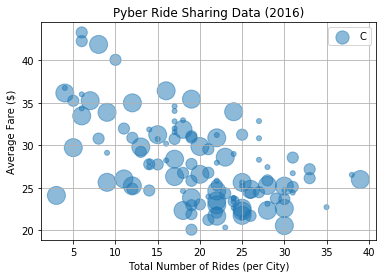

In [40]:
x=driver_ct
y=y_plot_points
s=driver_conc1['type']
plt.scatter(x,y,s=s*.2, alpha=.5)
plt.grid()
plt.legend('City Type')
plt.xlabel('Total Number of Rides (per City)')
plt.ylabel('Average Fare ($)')
plt.title("Pyber Ride Sharing Data (2016)")

In [10]:
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

In [11]:
# Show plot
plt.show()

## Total Fares by City Type

In [12]:
join_table['fare'].sum()

63538.64

In [25]:
# Calculate Type Percents
join_table.head()
types = join_table.groupby('type')
fares_per_type = pd.DataFrame(types['fare'].sum())
def percentage_df(row):
    return row['fare'] / float(63538.64)
fares_per_type.apply(percentage_df, axis=1).round(4)
fares_per_type['Percentage of Total Fares'] = pd.DataFrame(fares_per_type.apply(percentage_df,axis=1)).round(4)
percentage = fares_per_type['Percentage of Total Fares']*100
fares_per_type['Percentage of Total Fares'] = percentage
fares_per_type

,fare,Percentage of Total Fares
type,,
Rural,4327.93,6.81
Suburban,19356.33,30.46
Urban,39854.38,62.72


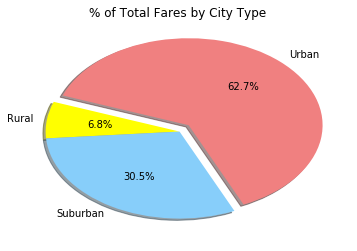

In [22]:
# Build Pie Chart
city_type = ['Rural','Suburban','Urban']
percentages = [6.81, 30.46, 62.72]
colors = ['yellow','lightskyblue','lightcoral']
explode = [0,0,.1]

plt.pie(percentages, explode=explode, labels=city_type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=160)
plt.title("% of Total Fares by City Type ")


# Save Figure
plt.savefig("PieFaresCityType.png")

In [23]:
# Show Figure
plt.show()

## Total Rides by City Type

In [32]:
join_table['driver_count'].count()

2375

In [40]:
# Calculate Ride Percents
join_table.head()
types = join_table.groupby('type')
rides_per_type = pd.DataFrame(types['type'].count())
rides_per_type
def percentage_df_1(row):
    return row['type'] / int(2375)
rides_per_type.apply(percentage_df_1, axis=1).round(4)
rides_per_type['Percentage of Total Rides'] = pd.DataFrame(rides_per_type.apply(percentage_df_1,axis=1)).round(4)
percentage_1 = rides_per_type['Percentage of Total Rides']*100
rides_per_type['Percentage of Total Rides'] = percentage_1
rides_per_type

,type,Percentage of Total Rides
type,,
Rural,125,5.26
Suburban,625,26.32
Urban,1625,68.42


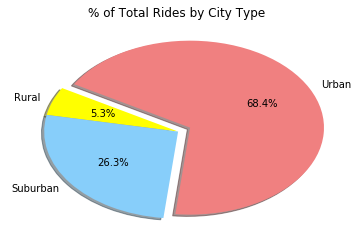

In [38]:
# Build Pie Chart
city_type = ['Rural','Suburban','Urban']
percentages = [5.26, 26.32, 68.42]
colors = ['yellow','lightskyblue','lightcoral']
explode = [0,0,.1]

plt.pie(percentages, explode=explode, labels=city_type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Rides by City Type ")

# Save Figure
plt.savefig("PieRidesCityType.png")

In [17]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [53]:
join_table['driver_count'].sum()

68709

In [66]:
# Calculate Driver Percents
join_table.head()
types = join_table.groupby('type')
drvs_per_type = pd.DataFrame(types['driver_count'].sum())
def percentage_df_2(row):
    return row['driver_count'] / int(68709)
drvs_per_type.apply(percentage_df_2, axis=1).round(4)
drvs_per_type['Percentage of Total Drivers'] = pd.DataFrame(drvs_per_type.apply(percentage_df_2,axis=1)).round(4)
percentage_2 = drvs_per_type['Percentage of Total Drivers']*100
drvs_per_type['Percentage of Total Drivers'] = percentage_2
drvs_per_type


,driver_count,Percentage of Total Drivers
type,,
Rural,537,0.78
Suburban,8570,12.47
Urban,59602,86.75


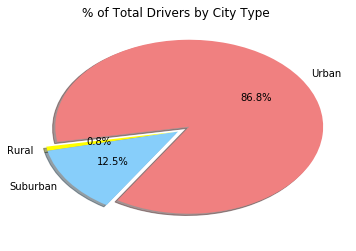

In [71]:
# Build Pie Charts
city_type = ['Rural','Suburban','Urban']
percentages = [.78, 12.47, 86.75]
colors = ['yellow','lightskyblue','lightcoral']
explode = [0,0,.1]

plt.pie(percentages, explode=explode, labels=city_type, colors=colors, autopct='%1.1f%%', shadow=True, startangle=190)
plt.title("% of Total Drivers by City Type ")

# Save Figure
plt.savefig("PieDriversCityType.png")

In [72]:
# Show Figure
plt.show()